In [1]:
import numpy as np #
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r"C:\Users\Pegah Khazaie\Desktop\data.csv")

In [4]:
d = {'M':1,'B':0}
dataset = dataset.replace(d) #replace M/B with 0 or 1 for the neural net classification
dataset = dataset.drop(['Unnamed: 32'],axis=1) #remove column 32 - unknown purpose
dataset = dataset.drop(['id'],axis=1) #remove the id - not needed for the neural net

In [5]:
dataset_temp = dataset.drop(['diagnosis'],axis=1) 
X = np.array(dataset_temp).T 
Y = np.array(dataset['diagnosis']).T 
Y = Y.reshape(1,569)

In [6]:
#Now, let's normalized our feature vector.  We will force the mean of each column to 0, and divide by the maximum
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) #Normalizing our dataset by subtracting the mean and dividing by the max

In [7]:
X_train = X_normalized[:,:380]
Y_train = Y[:,:380]

#We will take the remaining 189 for our cross-validation set
X_cv = X_normalized[:,381:]
Y_cv = Y[:,381:]

In [8]:
#We will now define our sigmoid function to be used in the output layer of our neural network (L3)
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [9]:
#We will now define our tanh(x) function to be used in hidden layers of our neural network (L1, L2)
#Note that the tanh(x) function allows better centering of data than the sigmoid function.  This is why it will be used in our hidden layers.

def tanh(z):
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

In [10]:
#Now, let's define our forward propogation function.
def forward_prop(X,W1,W2,W3,b1,b2,b3):
    
    #First layer forward propogation
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    #Second layer forward propogation
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    #Third layer forward propogation
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3) #A3 will produce our probability vector
    
    cache = {    
                  "Z1": Z1,
                  "A1": A1,
                  "Z2": Z2,
                  "A2": A2,
                  "Z3": Z3,
                  "A3": A3
            }
    return cache

In [12]:
#Now we will perform gradient descent for our neural network in the following steps:
#1) Start by randomly initializing our weight and intercept parameters
#2) Run forward propogation through our neural network
#3) Calculate the derivatives of our weights and intercept parameters via back propogation
#4) Refine our parameters using derivatives from (3)
#5) Reiterate 1 - 4 

def gradient_descent(iterations,X,Y,alpha):
    
    #Randomly initialized our parameters before running the algorithm
    W1 = np.random.randn(3,30)*0.01
    b1 = np.random.rand(3,1)
    W2 = np.random.randn(2,3)*0.01
    b2 = np.random.rand(2,1)
    W3 = np.random.rand(1,2)*0.01
    b3 = np.random.rand(1,1)
    dummy,m = X.shape
    
    caches = [] #we will store our cost at each iteration in this array
    count_vector = [] #We will store our iteration count in this array
    count = 0
    
    for i in range (1,iterations):
        
            count = count + 1
            
            count_vector.append(count)
        
            params = forward_prop(X,W1,W2,W3,b1,b2,b3) #forward propogation using our parameters
            
            #Define our values to be used in back propogation using the dictionary of values created from running forward_prop
            Z1 = params['Z1']
            Z2 = params['Z2']
            Z3 = params['Z3']
            A1 = params['A1']
            A2 = params['A2']
            A3 = params['A3']
            
            #Define our cost function, append the cost of each iteration to caches
            cost = -(1 / m)*np.sum(np.multiply(Y,np.log(A3)) + np.multiply((1-Y),np.log(1-A3)))
            caches.append(cost)
            
            #Back propogation for layer 3
            dA3 = -Y/A3 + (1-Y)/(1-A3)
            dZ3 = dA3 * sigmoid(Z3)*(1-sigmoid(Z3))
            dW3 = (1 / m)*np.dot(dZ3,A2.T)
            db3 = (1 / m)*np.sum(dZ3,axis=1,keepdims=True)
            
            #Back propogation for layer 2
            dA2 = np.dot(W3.T,dZ3)
            dZ2 = dA2*(1-np.power(tanh(Z2),2))
            dW2 = (1 / m)*np.dot(dZ2,A1.T)
            db2 = (1 / m)*np.sum(dZ2,axis=1,keepdims=True)
            
            #Back propogation for layer 1
            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*(1-np.power(tanh(Z1),2))
            dW1 = (1 / m)*np.dot(dZ1,X.T)
            db1 = (1 / m)*np.sum(dZ1,axis=1,keepdims=True)
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            W1 = W1 - alpha*dW1
            W2 = W2 - alpha*dW2
            W3 = W3 - alpha*dW3
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            b1 = b1 - alpha*db1
            b2 = b2 - alpha*db2
            b3 = b3 - alpha*db3
        
    return W1,W2,W3,b1,b2,b3,count_vector,caches

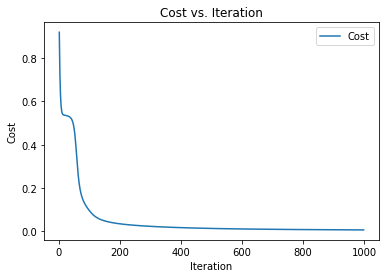

In [13]:
#Lets see if our algorithm is working.  We should see a declining learning curve with iteration, which eventually flatterns out
#This will help us determine the appropriate number of iterations to run to determine the appropriate parameters
#Note: we will use a learning rate of 0.5 for now

W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(1000,X_cv,Y_cv,0.5)

plt.plot(count,caches,label='Cost')

plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title("Cost vs. Iteration")

plt.legend()

plt.show()

In [14]:
def predict(X,Y,iterations,alpha,X_train,Y_train):

    W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(iterations,X_train,Y_train,alpha)
    
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3)
    
    dummy,m = A3.shape
    Y_prediction = np.zeros((1, m))
    
    for i in range(m):
        
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
        
    return Y_prediction

In [15]:
#Lets see how accurate the predictions made by our neural network are compared to the training set and cross validation set
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(X_train,Y_train,1000,0.5,X_train,Y_train) - Y_train)) * 100))
print("Cross validation accuracy: {} %".format(100 - np.mean(np.abs(predict(X_cv,Y_cv,1000,0.5,X_train,Y_train) - Y_cv)) * 100))

Train accuracy: 99.21052631578948 %
Cross validation accuracy: 96.80851063829788 %
